In [1]:
#Instalar libreria pydrive.
!pip install -U -q pydrive

In [2]:
#Importar archivos de googledrive con pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
#Autentificar datos y permisos
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#descargamos los archivos
downloaded = drive.CreateFile({'id': '1EAuA-M_eOxdUmYnbRiwhAMStPxde6lY6'})
downloaded.GetContentFile('DATASET_Violencia_Contra_la_Mujer_Enero 2018 a Junio 2025.csv')

In [5]:
#Importamos librería pandas
import pandas as pd

In [6]:
df = pd.read_csv('DATASET_Violencia_Contra_la_Mujer_Enero 2018 a Junio 2025.csv')
df.head()

,AÑO,MES,UBIGEO_HECHO,DPTO_HECHO,PROV_HECHO,DIST_HECHO,CANTIDAD
0,2023,12,200207,PIURA,AYABACA,PAIMAS,1
1,2021,9,150140,LIMA METROPOLITANA,LIMA,SANTIAGO DE SURCO,199
2,2021,2,210307,PUNO,CARABAYA,ITUATA,1
3,2022,12,190301,PASCO,OXAPAMPA,OXAPAMPA,11
4,2021,9,250203,UCAYALI,ATALAYA,TAHUANIA,1


In [7]:
df.columns

Index(['AÑO', 'MES', 'UBIGEO_HECHO', 'DPTO_HECHO', 'PROV_HECHO', 'DIST_HECHO',
       'CANTIDAD'],
      dtype='object')

In [8]:
df["PROV_HECHO"].value_counts()

,count
PROV_HECHO,
LIMA,3834
AREQUIPA,2158
CHICLAYO,1703
HUANCAYO,1446
JAUJA,1288
...,...
CAJATAMBO,47
LAURICOCHA,42
CANDARAVE,41


In [9]:
f = pd.DataFrame(df["PROV_HECHO"].value_counts().reset_index())
f

,PROV_HECHO,count
0,LIMA,3834
1,AREQUIPA,2158
2,CHICLAYO,1703
3,HUANCAYO,1446
4,JAUJA,1288
...,...,...
190,CAJATAMBO,47
191,LAURICOCHA,42
192,CANDARAVE,41
193,PURUS,20


In [10]:
df_copy = df.copy()

In [11]:
df_copy.drop(columns=["UBIGEO_HECHO"],inplace=True)

In [12]:
df_copy

,AÑO,MES,DPTO_HECHO,PROV_HECHO,DIST_HECHO,CANTIDAD
0,2023,12,PIURA,AYABACA,PAIMAS,1
1,2021,9,LIMA METROPOLITANA,LIMA,SANTIAGO DE SURCO,199
2,2021,2,PUNO,CARABAYA,ITUATA,1
3,2022,12,PASCO,OXAPAMPA,OXAPAMPA,11
4,2021,9,UCAYALI,ATALAYA,TAHUANIA,1
...,...,...,...,...,...,...
82846,2025,1,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,41
82847,2024,11,CAJAMARCA,CONTUMAZA,YONAN,4
82848,2019,5,JUNIN,JAUJA,MOLINOS,1
82849,2023,2,LA LIBERTAD,ASCOPE,ASCOPE,1


# **Datos estadísticos de casos documentados de violencia contra la mujer en el distrito de Lima entre el año 2020-2025**

In [25]:
#Filtrado de datos
df_2 = df_copy.drop(df_copy[df_copy["PROV_HECHO"] != "Lima"].index)
df_2 = df_copy.drop(df_2[df_2["AÑO"] < 2020].index)
df_2 = df_copy.drop(df_2[df_2["AÑO"] > 2025].index)
df_2

,AÑO,MES,DPTO_HECHO,PROV_HECHO,DIST_HECHO,CANTIDAD
0,2023,12,PIURA,AYABACA,PAIMAS,1
1,2021,9,LIMA METROPOLITANA,LIMA,SANTIAGO DE SURCO,199
2,2021,2,PUNO,CARABAYA,ITUATA,1
3,2022,12,PASCO,OXAPAMPA,OXAPAMPA,11
4,2021,9,UCAYALI,ATALAYA,TAHUANIA,1
...,...,...,...,...,...,...
82846,2025,1,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,41
82847,2024,11,CAJAMARCA,CONTUMAZA,YONAN,4
82848,2019,5,JUNIN,JAUJA,MOLINOS,1
82849,2023,2,LA LIBERTAD,ASCOPE,ASCOPE,1


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AÑO,82851.0,2021.422868,2.102640,2018.0,2020.0,2021.0,2023.0,2025.0
MES,82851.0,6.381528,3.456567,1.0,3.0,6.0,9.0,12.0
UBIGEO_HECHO,82851.0,113514.947339,67101.828658,10101.0,50705.0,110503.0,150809.0,250401.0
CANTIDAD,82851.0,23.119250,60.901543,1.0,2.0,4.0,16.0,1301.0


In [15]:
df_cuentas = df_2.groupby(['PROV_HECHO'])["CANTIDAD"].describe().reset_index()
df_cuentas

,PROV_HECHO,count,mean,std,min,25%,50%,75%,max
0,ABANCAY,588.0,26.129252,41.672369,1.0,2.0,4.0,27.25,176.0
1,ACOBAMBA,354.0,3.460452,3.015515,1.0,1.0,2.0,5.00,14.0
2,ACOMAYO,303.0,2.435644,1.933065,1.0,1.0,2.0,3.00,13.0
3,AIJA,97.0,1.536082,0.866769,1.0,1.0,1.0,2.00,5.0
4,ALTO AMAZONAS,115.0,48.104348,29.248594,1.0,32.0,53.0,69.50,112.0
...,...,...,...,...,...,...,...,...,...
190,YAULI,258.0,5.988372,7.308905,1.0,1.0,2.0,9.00,37.0
191,YAUYOS,357.0,1.294118,0.580869,1.0,1.0,1.0,1.00,5.0
192,YUNGAY,424.0,6.518868,7.469061,1.0,1.0,3.0,8.00,37.0
193,YUNGUYO,236.0,5.940678,6.581460,1.0,1.0,2.0,10.00,27.0


In [16]:
#La libreria plotly nos permite realizar una grafica de barras interactiva
import plotly.graph_objects as go

a = go.Figure(data=go.Bar(x=df_cuentas["PROV_HECHO"],y=df_cuentas["count"]))
a.update_layout(title=go.layout.Title(
        text="Provincias con casos documentados de violencia a la mujer"))
a.show()

In [17]:
df_top5= df_cuentas.sort_values(by='count', ascending=False).head(5)
fig_top5 = go.Figure(data=go.Bar(x=df_top5["PROV_HECHO"], y=df_top5["count"]))
fig_top5.update_layout(title=go.layout.Title(
      text="Top 5 Provincias con Mayor Cantidad de Casos Documentados de Violencia contra la Mujer"
))
fig_top5.show()

/tmp/ipython-input-3287020472.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




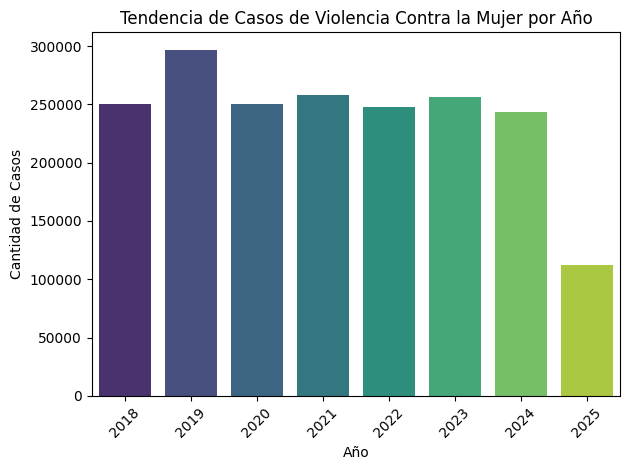

In [26]:
 import matplotlib.pyplot as plt
 import seaborn as sns

 df_copy.anual= df_2.groupby("AÑO")["CANTIDAD"].sum().reset_index()
 plt.figure()
 sns.barplot(data=df_copy.anual, x="AÑO", y="CANTIDAD", palette="viridis")
 plt.title("Tendencia de Casos de Violencia Contra la Mujer por Año")
 plt.xlabel("Año")
 plt.ylabel("Cantidad de Casos")
 plt.xticks(rotation=45)
 plt.tight_layout()
 plt.show()

/tmp/ipython-input-2997757774.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




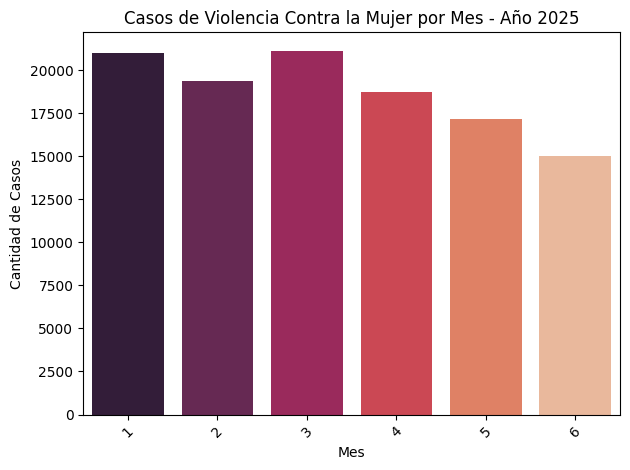

In [28]:
df_2025 = df[df["AÑO"] == 2025]
casos_mes_max = df_2025.groupby("MES")["CANTIDAD"].sum().reset_index()
casos_por_mes = casos_mes_max.sort_values("MES")
plt.figure()
sns.barplot(data=casos_por_mes, x="MES", y="CANTIDAD", palette="rocket")
plt.title("Casos de Violencia Contra la Mujer por Mes - Año 2025")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df_cuentas["RIC"] = df_cuentas["75%"] - df_cuentas["25%"]

In [21]:
#Diagrama de burbujas
import plotly.express as px

fig = px.scatter(df_cuentas, x="RIC", y="50%",
	         size="count", color="count",log_y=False,log_x=False,size_max=40)

fig.update_layout(title=go.layout.Title(
        text="DISTRIBUCION INTERCUARTIL DE distritos con mayor indice de violencia en el país"))
fig.show()

Conclusiones: Se observo mediante el analisis exploratorio de datos realizado en el dataset "Violencia contra la mujer 2018-2025" con información recopilada de casos de violencia contra la mujer en Perú, que en el distrito de Lima entre los años 2020 y 2025 el distrito de Lima presentó 3834 casos